In [56]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
products_rel_disc=pd.read_csv("./Resources/apple_data.csv")
stocks=pd.read_csv("./Resources/AAPL.csv", parse_dates=['Date'])

date_format1_regex='[a-zA-Z]+\s\d{1,2},\s\d{4}'
products_rel_disc=products_rel_disc[(products_rel_disc['Released'].str.contains(date_format1_regex))]

### Discontinued -> Date, Current, Upcoming 

products_rel_disc

,Released,Model,Family,Discontinued
0,"April 11, 1976",Apple I,Apple I,"September 30, 1977"
1,"June 1, 1977",Apple II,Apple II,"May 1, 1979"
2,"June 1, 1978",Disk II,Drives,"May 1, 1984"
3,"June 1, 1979",Apple II Plus,Apple II series,"December 1, 1982"
4,"June 1, 1979",Apple II EuroPlus,Apple II series,"December 1, 1982"
...,...,...,...,...
666,"September 22, 2023",EarPods (USB-C),Headphones,current
667,"November 1, 2023",Apple Pencil (USB-C),iPad,current
668,"November 7, 2023","iMac (24-inch, M3, 2023)",iMac,current
669,"November 7, 2023","MacBook Pro (M3/M3 Pro/M3 Max) (14-inch, 2023)",MacBook Pro,current


In [57]:
products_rel_disc['Released']=pd.to_datetime(products_rel_disc['Released'], format='%B %d, %Y')

products_rel_disc.head()


,Released,Model,Family,Discontinued
0,1976-04-11,Apple I,Apple I,"September 30, 1977"
1,1977-06-01,Apple II,Apple II,"May 1, 1979"
2,1978-06-01,Disk II,Drives,"May 1, 1984"
3,1979-06-01,Apple II Plus,Apple II series,"December 1, 1982"
4,1979-06-01,Apple II EuroPlus,Apple II series,"December 1, 1982"


In [58]:
products_rel_disc.columns=products_rel_disc.columns.str.strip()
product_stocks=pd.merge(products_rel_disc,stocks, left_on='Released', right_on='Date', how='left')
product_stocks.dropna(inplace=True)
product_stocks.head()

,Released,Model,Family,Discontinued,Date,Open,High,Low,Close,Adj Close,Volume
15,1981-09-01,Apple ProFile,Drives,"September 1, 1986",1981-09-01,0.095424,0.095982,0.095424,0.095424,0.074481,37027200.0
16,1981-12-01,Apple III Revised[1],Apple III,"December 1, 1983",1981-12-01,0.083147,0.083705,0.083147,0.083147,0.064898,23385600.0
17,1982-10-01,Apple Dot Matrix Printer,Printers,"December 1, 1983",1982-10-01,0.082589,0.083705,0.082589,0.082589,0.064463,46256000.0
18,1982-10-01,Apple Daisy Wheel Printer,Printers,"December 1, 1983",1982-10-01,0.082589,0.083705,0.082589,0.082589,0.064463,46256000.0
20,1983-01-19,Apple Lisa[2],68000,"January 1, 1984",1983-01-19,0.148996,0.151786,0.148438,0.150112,0.117166,169657600.0


In [59]:
products_rel_disc_2009=product_stocks[(product_stocks['Released']>'2009-01-01')]
products_rel_disc_2009.head()

,Released,Model,Family,Discontinued,Date,Open,High,Low,Close,Adj Close,Volume
343,2009-01-06,"MacBook Pro (Early 2009) (17"")",MacBook Pro,"June 8, 2009",2009-01-06,3.426786,3.470357,3.299643,3.322143,2.840491,1.289310e+09
344,2009-01-29,MacBook (Early 2009) (White),MacBook,"May 27, 2009",2009-01-29,3.324643,3.369286,3.307143,3.321429,2.839881,5.927292e+08
345,2009-03-03,Mac Mini (Early 2009),Mac Mini,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
346,2009-03-03,iMac (Early 2009),iMac,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
347,2009-03-03,Mac Pro (Early 2009),Mac Pro,"August 9, 2010",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08


In [60]:
family_group_2009 = products_rel_disc_2009.groupby(['Released','Family'])
grp_2009_members_count = pd.DataFrame(family_group_2009.size())
grp_2009_members_count.rename(columns={grp_2009_members_count.columns[0]:"Launches"}, inplace=True)
grp_2009_members_count=pd.merge(grp_2009_members_count.reset_index(["Released",'Family']),stocks, left_on='Released', right_on='Date', how='left')
grp_2009_members_count.pop('Date')
grp_2009_members_count.rename(columns={"Released":"Released_date"},inplace=True)
#grp_2009_members_count.sort_values(['Released_date'],ascending=True,inplace=True)
grp_2009_members_count.head()

,Released_date,Family,Launches,Open,High,Low,Close,Adj Close,Volume
0,2009-01-06,MacBook Pro,1,3.426786,3.470357,3.299643,3.322143,2.840491,1289310400
1,2009-01-29,MacBook,1,3.324643,3.369286,3.307143,3.321429,2.839881,592729200
2,2009-03-03,AirPort,1,3.176071,3.240714,3.138571,3.156071,2.698497,724340400
3,2009-03-03,"AirPort, drives",2,3.176071,3.240714,3.138571,3.156071,2.698497,724340400
4,2009-03-03,Keyboards,1,3.176071,3.240714,3.138571,3.156071,2.698497,724340400


In [61]:
only_family_group_2009 = products_rel_disc_2009.groupby(['Family']).size()
only_family_group_2009=pd.DataFrame(only_family_group_2009)
only_family_group_2009.rename(columns={only_family_group_2009.columns[0]:"Total_Launches"}, inplace=True)
only_family_group_2009.sort_values(['Total_Launches'],inplace=True)
only_family_group_2009.reset_index(inplace=True)
only_family_group_2009.head()

,Family,Total_Launches
0,AirPort Express,1
1,iPod Classic,1
2,Cleaning aid,1
3,Input Device Accessories,1
4,Xserve,1


In [62]:
grp_2009_members_count_g3to6=grp_2009_members_count[(grp_2009_members_count['Launches']>=3)]
grp_2009_members_count_g3to6.head()

,Released_date,Family,Launches,Open,High,Low,Close,Adj Close,Volume
49,2011-10-14,iPhone,3,14.886786,15.071429,14.831071,15.071429,12.886341,573367200
64,2012-11-02,iPad,4,21.281786,21.319643,20.526787,20.600000,17.688997,599373600
65,2012-11-16,iPad,4,18.757143,18.928572,18.062500,18.845715,16.256525,1266893600
73,2013-09-20,iPhone,4,17.071428,17.091070,16.642857,16.693214,14.675807,699302800
77,2013-11-12,iPad,3,18.488214,18.711430,18.464287,18.571787,16.422674,204276800


In [63]:
grp_2009_members_count_g1=grp_2009_members_count[(grp_2009_members_count['Launches']==1)]
grp_2009_members_count_g2=grp_2009_members_count[(grp_2009_members_count['Launches']==2)]
grp_2009_members_count_g3=grp_2009_members_count[(grp_2009_members_count['Launches']==3)]
grp_2009_members_count_g4=grp_2009_members_count[(grp_2009_members_count['Launches']==4)]
grp_2009_members_count_g5=grp_2009_members_count[(grp_2009_members_count['Launches']==5)]
grp_2009_members_count_g6=grp_2009_members_count[(grp_2009_members_count['Launches']==6)]


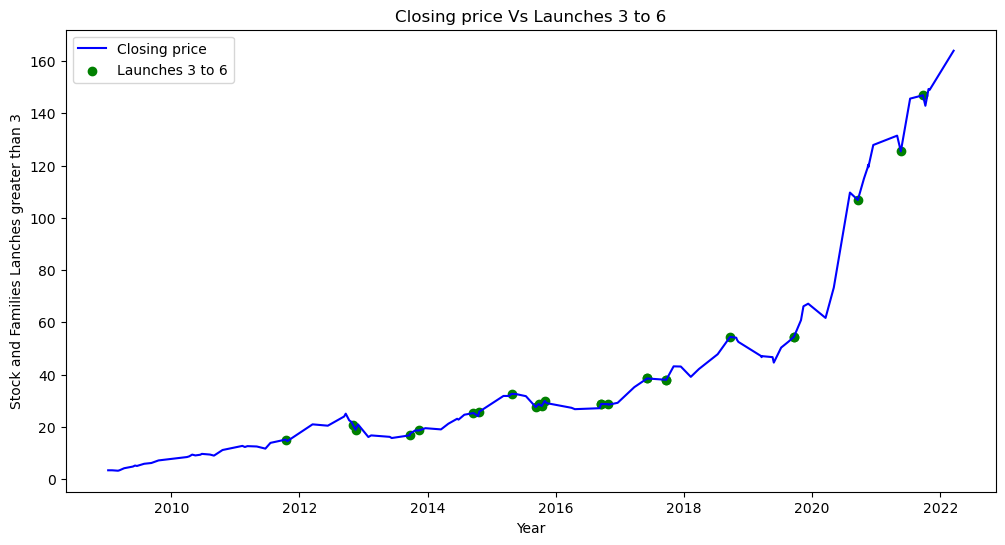

In [64]:
fig=plt.figure(figsize=(12,6))
profit_margin, = plt.plot(grp_2009_members_count['Released_date'], grp_2009_members_count['Close'], color="blue", label="Closing price")
only_g3 = plt.scatter(grp_2009_members_count_g3to6['Released_date'], grp_2009_members_count_g3to6['Close'], color="green",label="Launches 3 to 6")
plt.title("Closing price Vs Launches 3 to 6")
plt.xlabel("Year")
plt.ylabel("Stock and Families Lanches greater than 3")
plt.legend(handles=[profit_margin, only_g3], loc="best")
#plt.grid()
plt.show()

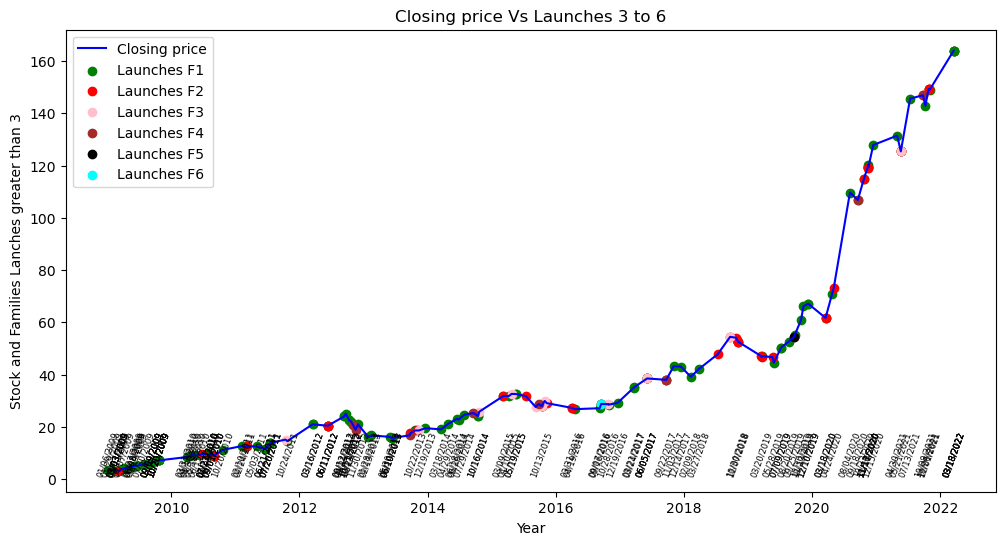

In [65]:

# def plot_families(each_family,lbl,title,y_label):
#     fig=plt.figure(figsize=(12,6))
#     profit_margin, = plt.plot(grp_2009_members_count['Released_date'], grp_2009_members_count['Close'], color="blue", label="Closing price")
#     only_g3 = plt.scatter(each_family['Released_date'], each_family['Close'], color="green",label=lbl)
#     plt.title(title)
#     plt.xlabel("Year")
#     plt.ylabel(y_label)
#     plt.legend(handles=[profit_margin, only_g3], loc="best")
#     #plt.grid()
#     plt.show()
    

fig=plt.figure(figsize=(12,6))
profit_margin, = plt.plot(grp_2009_members_count['Released_date'], grp_2009_members_count['Close'], color="blue", label="Closing price")
Launche_f1 = plt.scatter(grp_2009_members_count_g1['Released_date'], grp_2009_members_count_g1['Close'], color="green",label="Launches F1")
Launche_f2 = plt.scatter(grp_2009_members_count_g2['Released_date'], grp_2009_members_count_g2['Close'], color="red",label="Launches F2")
Launche_f3 = plt.scatter(grp_2009_members_count_g3['Released_date'], grp_2009_members_count_g3['Close'], color="pink",label="Launches F3")
Launche_f4 = plt.scatter(grp_2009_members_count_g4['Released_date'], grp_2009_members_count_g4['Close'], color="brown",label="Launches F4")
Launche_f5 = plt.scatter(grp_2009_members_count_g5['Released_date'], grp_2009_members_count_g5['Close'], color="black",label="Launches F5")
Launche_f6 = plt.scatter(grp_2009_members_count_g6['Released_date'], grp_2009_members_count_g6['Close'], color="aqua",label="Launches F6")

plt.title("Closing price Vs Launches 3 to 6")
plt.xlabel("Year")
plt.ylabel("Stock and Families Lanches greater than 3")
plt.legend(handles=[profit_margin, Launche_f1, Launche_f2, Launche_f3, Launche_f4, Launche_f5, Launche_f6], loc="best")
#plt.grid()


for x,y in zip(grp_2009_members_count_g1['Released_date'], grp_2009_members_count_g1['Launches']):
        label = x.strftime("%m/%d/%Y")
        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,0), # distance from text to points (x,y)
                     ha='center',rotation=70, fontsize=6) # horizontal alignment can be left, right or center

plt.show()

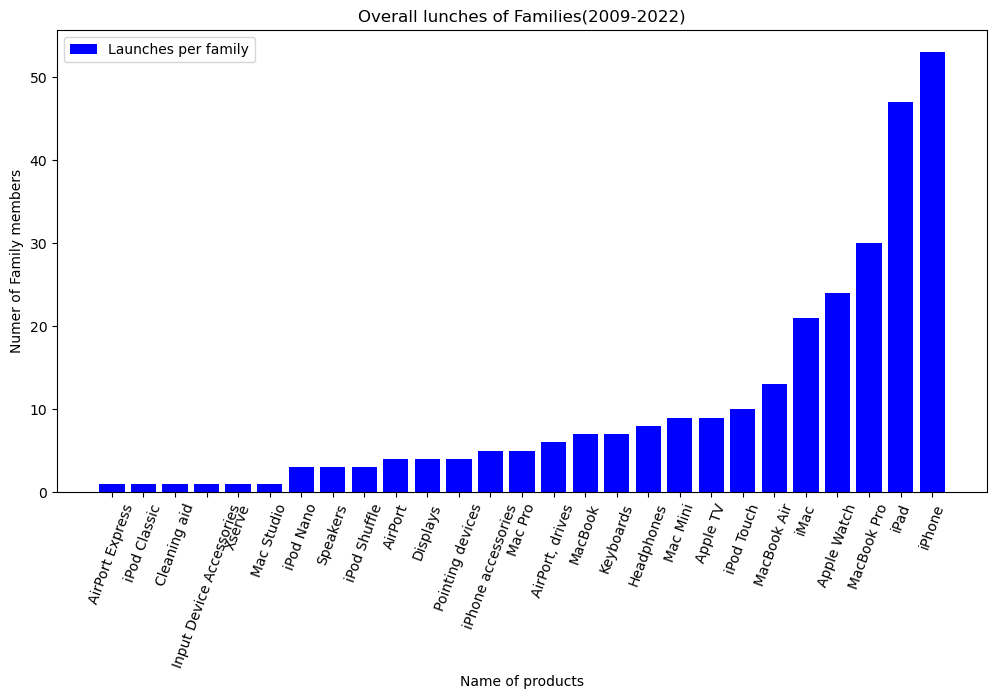

In [66]:
fig=plt.figure(figsize=(12,6))
only_family = plt.bar(only_family_group_2009['Family'], only_family_group_2009['Total_Launches'], color="blue", label="Launches per family")
plt.title("Overall lunches of Families(2009-2022)")
plt.xlabel("Name of products")
plt.ylabel("Numer of Family members")
plt.legend(handles=[only_family], loc="best")
#plt.grid()
plt.xticks(rotation=70)
plt.show()

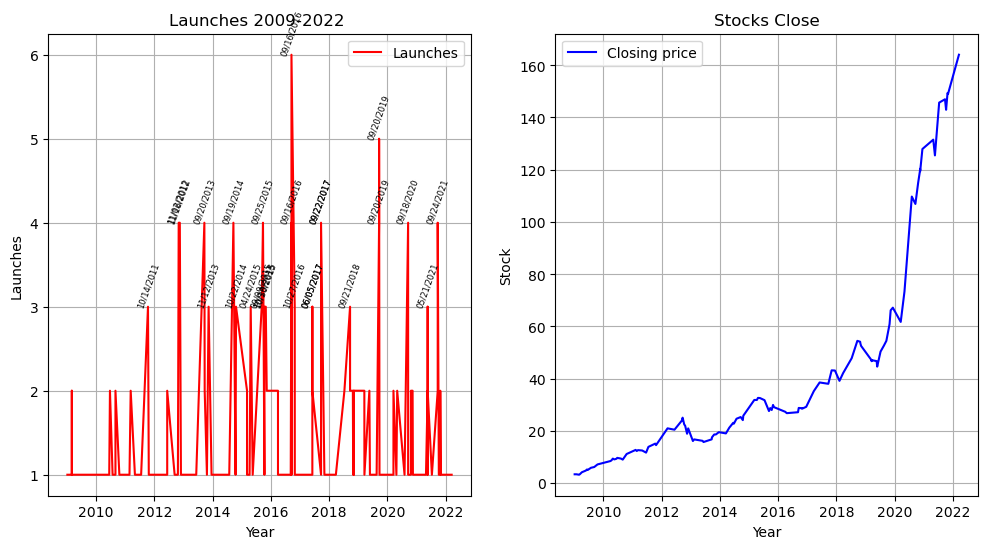

In [67]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1, 2, 1)
#plt.subplot(1, 2, 1) # row 1, col 2 index 1
appl_stocks,= ax.plot(grp_2009_members_count['Released_date'], grp_2009_members_count['Launches'], color="red",label="Launches")
plt.title("Launches 2009-2022 ")
plt.xlabel("Year")
plt.ylabel("Launches")
#plt.label(grp_2009_members_count['Released_date'])
ax.annotate("t",xy=(1,2),xytext=('a',"b"))
plt.legend(handles=[appl_stocks], loc="best")
plt.grid()

for x,y in zip(grp_2009_members_count['Released_date'], grp_2009_members_count['Launches']):
    if y >=3:
        label = x.strftime("%m/%d/%Y")

        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,0), # distance from text to points (x,y)
                     ha='center',rotation=70, fontsize=6) # horizontal alignment can be left, right or center


plt.subplot(1, 2, 2) # row 2, col 2 index 1
profit_margin, = plt.plot(grp_2009_members_count['Released_date'], grp_2009_members_count['Close'], color="blue", label="Closing price")
plt.title("Stocks Close")
plt.xlabel("Year")
plt.ylabel("Stock")
plt.legend(handles=[profit_margin], loc="best")
plt.grid()
plt.show()